In [2]:
#import data to workspace

#set working environment packages
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd
import numpy as np


#opening file into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))

citibikedata = z.open('201606-citibike-tripdata.csv')
df = pd.read_csv(citibikedata)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [3]:
#drop columns that we don't need
df1 = pd.DataFrame(df[df.columns[-2]])
df1['age'] = 2016 - df['birth year']
df1 = df1.dropna()
len(df1)

1265112

In [4]:
df1.head()

,birth year,age
0,1972.0,44.0
1,1967.0,49.0
2,1989.0,27.0
3,1991.0,25.0
4,1989.0,27.0


In [5]:
#drop age bigger than 85
df1 = df1[df1.age <= 85]

In [6]:
#calculate age mean and age deviation from citibikers
age_mean = df1.age.mean()
age_std = df1.age.std()

In [7]:
#count occurance number of each age
from collections import Counter

age_dist = pd.DataFrame(Counter(df1.age),index = ('age','number')).T
#index = ('age','number')
age_dist['number'] = age_dist['number']/len(df1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


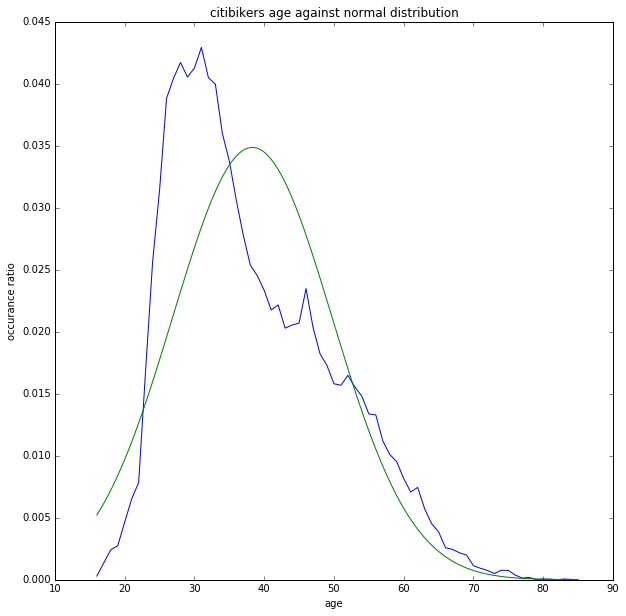

In [8]:
# now we plot the sample data against normal distribution of the same mean and standard deviation.
import pylab as plt
%pylab inline
from scipy.stats import norm
#create a x list with 1000 items to make the plot smooth.
x = np.linspace(min(age_dist.index),max(age_dist.index),1000)
#generating y according to normal distribution.
y = norm.pdf(x, loc = age_mean, scale = age_std)

#plot sample occurance and the gaussian distribution we generated.
plt.figure(figsize = (10,10))
plt.plot(age_dist['number'])
plt.plot(x,y)
plt.xlabel('age')
plt.ylabel('occurance ratio')
plt.title('citibikers age against normal distribution')

In [ ]:
# now we plot the sample data against lognormal distribution of the (same mean-20) and standard deviation.
# because we want to test the shape of our sample, we modified the mean and standard deviation of our tested distribution.
import scipy
from scipy.stats import lognorm
#create a x list with 1000 items to make the plot smooth.
#y = lognorm.pdf(x, s = .5, loc = age_mean-20, scale = age_std)
#x = np.linspace(min(age_dist.index),max(age_dist.index),1000)
#generating y according to normal distribution.
#y = norm.pdf(x, loc = age_mean, scale = age_std)

shape, loc, scale = scipy.stats.lognorm.fit(df1.age, floc=0)
plt.hist(df1.age, bins=15, normed=True, color='c', alpha=0.75)
xmin = df1.age.min()
xmax = df1.age.max()
x = np.linspace(xmin, xmax, 1000)
pdf = scipy.stats.lognorm.pdf(x, shape, scale=scale)
plt.plot(x, pdf, 'k')
plt.xlabel('age')
plt.ylabel('occurance ratio')
plt.title('citibikers age against lognormal distribution')



From the plot above, we make guesses that age distribution follows normal distribution or a chi-squared distribution.

# 1. Normal distribution
## a. ks test 
### Idea: citibikers age distribution doesn't draw from a normal distrubution
### Null hypothesis: citibikers age distribution draws from a normal distrubution
### Alternative hypothesis: citibikers age distribution draw from a normal distrubution

significant level $\alpha = 0.05$

In [10]:
#create a random normal distribution of the size of age distribution, with mean = age_mean, standard deviation = age_std
import numpy as np
import math

norm_dist = np.random.normal(age_mean,age_std,len(df1))
print(len(df1))
D = 1.48 / math.sqrt(1264418)
print D

1264418
0.00131618331346


In [11]:
#test the age distribution with normal distribution
from scipy import stats
stats.kstest(df1.age, 'norm', args=(age_mean, age_std))

KstestResult(statistic=0.10926305300442851, pvalue=0.0)

#### 1. using KS statistic: 
##### Since it's a two-tailed test, under $alpha = 0.05$, $c(alpha/2) = 1.48$
#### sample size = 1264418
#### $c(\alpha/2)/ \sqrt{sample size} = 1.48/ \sqrt{1264418} = 0.0013161833134623662 < D$
### Reject null hypothesis

#### 2. using p-value: 
##### $pvalue = 0.0 <\alpha/2 = 0.025$
### Reject null hypothesis

## b. AD test / if AD stats > critical value, reject null.
### Idea: citibikers age distribution doesn't draw from a normal distrubution
### Null hypothesis: citibikers age distribution draws from a normal distrubution
### Alternative hypothesis: citibikers age distribution draw from a normal distrubution

significant level $\alpha = 0.05$

In [12]:
stats.anderson(df1.age, dist='norm')

AndersonResult(statistic=20290.215798143763, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### While significance leve = 0.05, critical value = 0.787. $AS statistics = 20290.215798143763 >> critical value$
### Reject null hypothesis

# 2. Lognormal distribution
## ks test
### Idea: citibikers age distribution doesn't draw from a normal distrubution
### Null hypothesis: citibikers age distribution draws from a normal distrubution
### Alternative hypothesis: citibikers age distribution draw from a normal distrubution

significant level $\alpha = 0.05$

In [13]:
stats.kstest(df1.age,'lognorm', args=(scale, shape))

KstestResult(statistic=0.53029205068124341, pvalue=0.0)

#### $pvalue = 0.0 < \alpha/2 = 0.025$
### Reject null hypothesis.

# 3. Gumbel distribution
## AD test
### Idea: citibikers age distribution doesn't draw from a normal distrubution
### Null hypothesis: citibikers age distribution draws from a normal distrubution
### Alternative hypothesis: citibikers age distribution draw from a normal distrubution

significant level $\alpha = 0.05$

In [14]:
stats.anderson(df1.age, 'gumbel')

AndersonResult(statistic=44586.512668676907, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))

####  significance value = 0.05, critical value = 0.757. $statistic = 44586.512668676907 >> critical value$
### Reject null hypothesis.

EXTRA:

In [15]:
path = 'https://feeds.citibikenyc.com/stations/stations.json'
r2 = urllib2.urlopen(path).read()
station = pd.read_json(r2)

In [16]:
station.iloc[0][1]

{u'altitude': u'',
 u'availableBikes': 0,
 u'availableDocks': 37,
 u'city': u'',
 u'id': 72,
 u'landMark': u'',
 u'lastCommunicationTime': u'2016-10-10 02:20:04 PM',
 u'latitude': 40.76727216,
 u'location': u'',
 u'longitude': -73.99392888,
 u'postalCode': u'',
 u'stAddress1': u'W 52 St & 11 Ave',
 u'stAddress2': u'',
 u'stationName': u'W 52 St & 11 Ave',
 u'statusKey': 1,
 u'statusValue': u'In Service',
 u'testStation': False,
 u'totalDocks': 39}

In [17]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [18]:
#create column coordinate in format '(longitude, latitude)'

df['coordinate'] = '(' + df['start station longitude'].astype(str) + ',' + df['start station latitude'].astype(str) + ')'


All the above tests reject that the sample data draws from normal/lognormal/gumble distribution. 
According to the central limit theorem, it could result from the lack of sample data.